### ep2-julia

In [1]:
# libraries
using Metrics
using Random
using Distributions
using Plots; gr()
using Printf

In [2]:
# generates artificial linear data
function artificial_linear_data(N)
    X = [range(90, 1200; length=N);]
    gamma = rand(Normal(30, 10), N)
    y = 50 * X + gamma * 400
    (X, y)
end

X, y = artificial_linear_data(100)
size(X), mean(X), std(X), size(y), mean(y), std(y)

((100,), 645.0000000000001, 325.2803645780711, (100,), 43794.96818382493, 16108.137354341914)

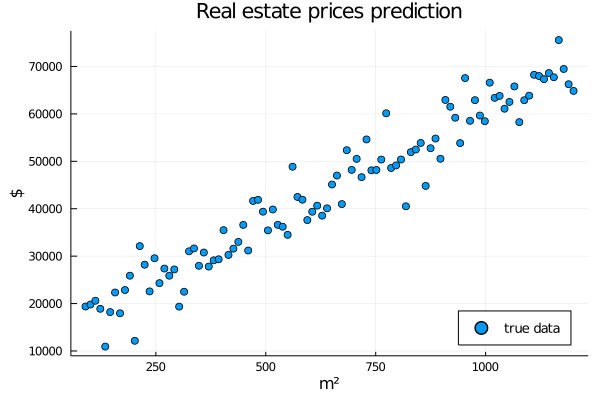

In [3]:
function plot_points_regression(X, y)
    scatter(X, y, 
        title = "Real estate prices prediction",
        xlabel = "m\u00b2",
        ylabel = "\$",
        yformatter = :plain,
        legend = :bottomright,
        legendfontsize = 9,
        label = "true data")
end

plot_points_regression(X, y)

In [4]:
function normal_equation_weights(X, y)
    N = size(X)[1]
    X_til = hcat(ones(N), X)
    w = inv(X_til' * X_til) * X_til' * y
end

w = normal_equation_weights(X, y)

2-element Array{Float64,1}:
 12902.584492300097
    47.89516851399193

In [5]:
function normal_equation_prediction(X, w)
    N = size(X)[1]
    X_til = hcat(ones(N), X)
    ŷ = X_til * w
end

ŷ = normal_equation_prediction(X, w)
r2 = r2_score(y, ŷ)

0.9309659430924802

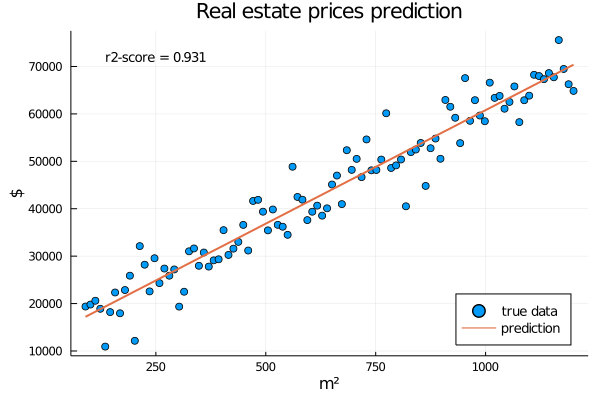

In [6]:
plot_points_regression(X, y)
plot!(X, ŷ, label = "prediction", linewidth = 2)
annotate!(250, 72000, text(@sprintf("r2-score = %.3f", r2), 9))

In [8]:
# Let us use the prediction function
x = [650]
prediction = normal_equation_prediction(x, w)
@printf("size = %s m2; predicted value = \$ %0.2f", x[1], prediction[1])


size = 650 m2; predicted value = $ 44034.44